# Machine Learning with Python

Python has several packages for machine learning. We will use the most popular package:
[scikit learn](https://scikit-learn.org)

See scikit learn's section on [supervised learning](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

In [53]:
import pandas as pd

# data
from sklearn.datasets import load_iris

# learner
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# make plots larger
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=15,15

## Load data

The iris dataset comes with scikit learn. It contains four measurements for 150 flowers of three subspecies of the iris family. The class attribute is the subspecies. Details can be found on the [Wikipedia page for the iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). We load the data as a [pandas dataframe](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe). Dataframes are similar to spreadsheets or SQL tables (each column can have its own data type) and are used often to represent data for machine learning.

In [54]:
iris = load_iris(as_frame = True)
iris['frame']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [55]:
X = iris['data']
y = iris['target']

print(X)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [56]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64


Visualize the dataframe using a scatter plot matrix.

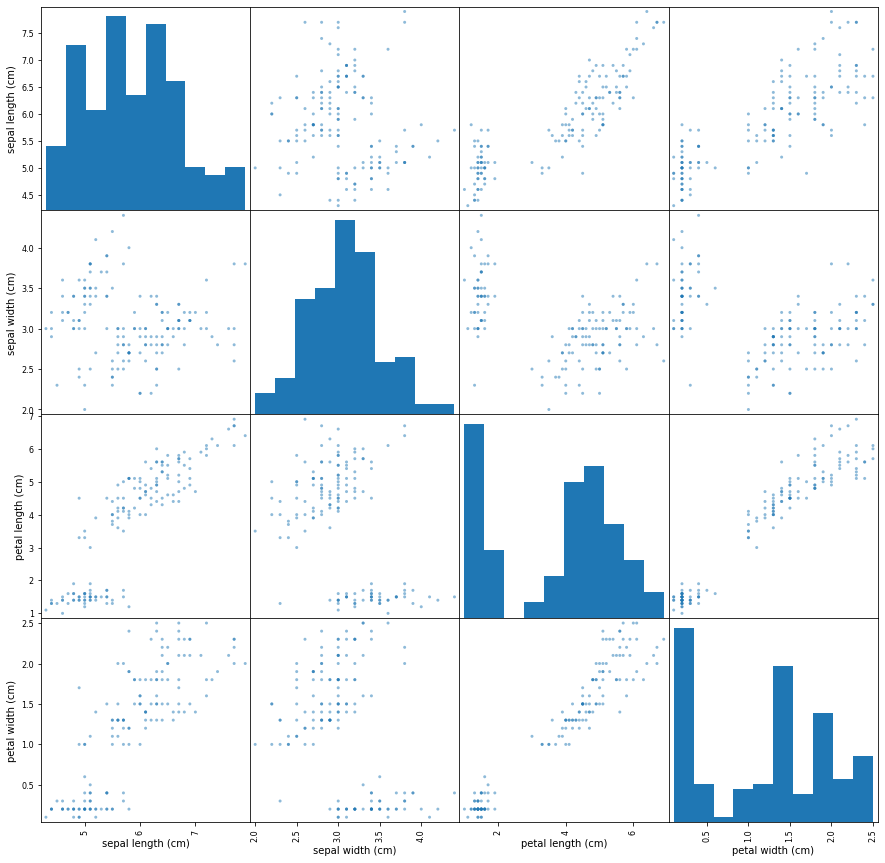

In [57]:
plt = pd.plotting.scatter_matrix(X)

 ## Create a training and test set
 
 Split the data into test data used to learn the model and test data to evaluate the model.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
136                6.3               3.4                5.6               2.4
125                7.2               3.2                6.0               1.8
99                 5.7               2.8                4.1               1.3
119                6.0               2.2                5.0               1.5
39                 5.1               3.4                1.5               0.2
..                 ...               ...                ...               ...
52                 6.9               3.1                4.9               1.5
59                 5.2               2.7                3.9               1.4
126                6.2               2.8                4.8               1.8
17                 5.1               3.5                1.4               0.3
75                 6.6               3.0                4.4               1.4

[120 rows x 4 columns]


In [59]:
print(X_test)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
73                 6.1               2.8                4.7               1.2
61                 5.9               3.0                4.2               1.5
124                6.7               3.3                5.7               2.1
56                 6.3               3.3                4.7               1.6
19                 5.1               3.8                1.5               0.3
43                 5.0               3.5                1.6               0.6
80                 5.5               2.4                3.8               1.1
145                6.7               3.0                5.2               2.3
28                 5.2               3.4                1.4               0.2
110                6.5               3.2                5.1               2.0
57                 4.9               2.4                3.3               1.0
74                 6.4               2.9                4.3     

## Learn a decision tree on the training data

scikit-learn uses an optimized version of the CART algorithm. Learning a model in scikit-learn consists of initializing the learner (with hyperparameters, if any) and calling the fit function with the training data. For details and available hyperparameters see: https://scikit-learn.org/stable/modules/tree.html

In [60]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier()

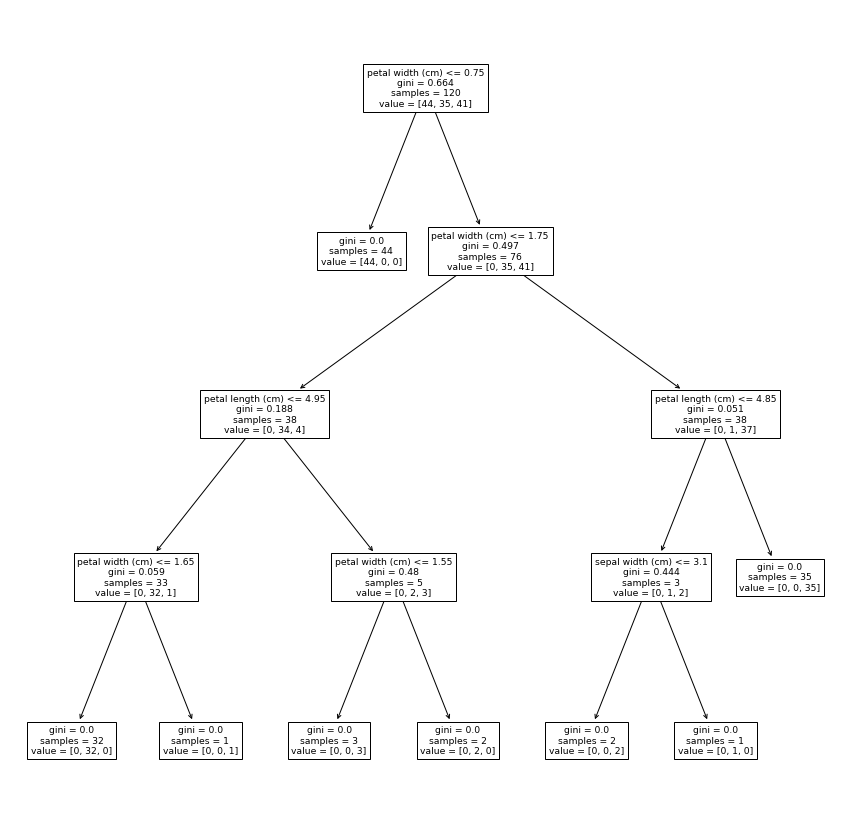

In [61]:
pl = tree.plot_tree(clf, feature_names = list(X_train.columns)) 

In [62]:
print(tree.export_text(clf, feature_names = list(X_train.columns)))

|--- petal width (cm) <= 0.75
|   |--- class: 0
|--- petal width (cm) >  0.75
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



## Test on the test data

It is important that the test data was not seen by the algorithm before. The goal is to estimate the generalization error/accuracy.

In [63]:
pred = clf.predict(X_test)

print("y_test:\t", list(y_test))
print("pred:\t",   list(pred))

y_test:	 [1, 1, 2, 1, 0, 0, 1, 2, 0, 2, 1, 1, 2, 0, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1]
pred:	 [1, 1, 2, 1, 0, 0, 1, 2, 0, 2, 1, 1, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1]


Calculate accuracy on the test data

In [64]:
accuracy_score(pred, y_test)

0.9666666666666667

## Hyperparameters: Create a decision tree with restricted depth

Hyperparameters (together with other parameters) can be found at https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

We set hyperparameter `max_depth` to 3.

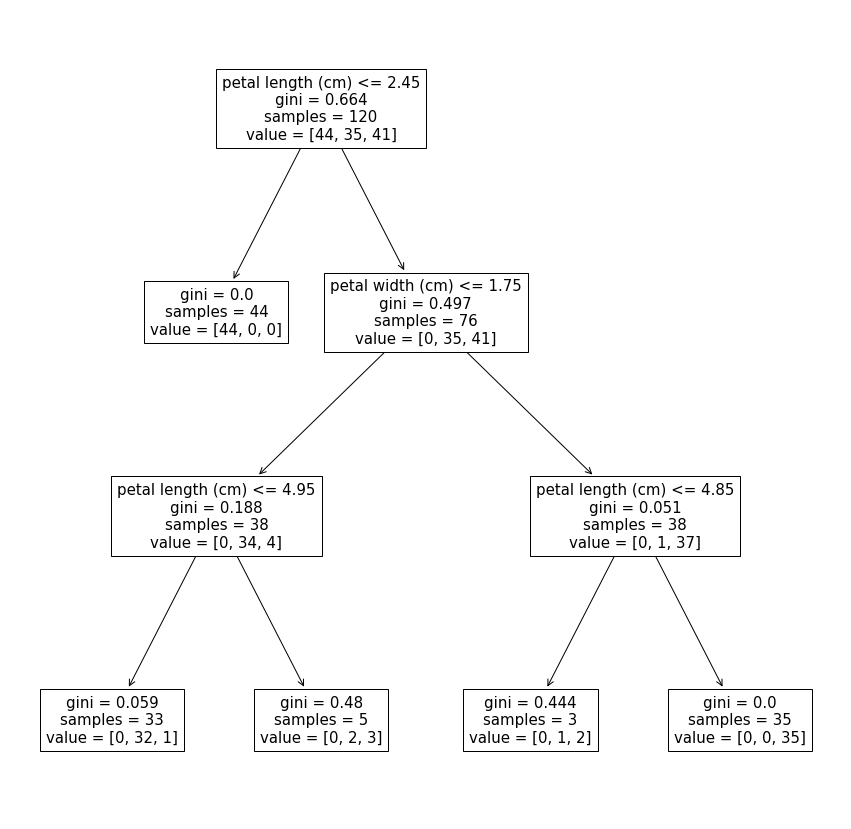

In [65]:
clf2 = tree.DecisionTreeClassifier(max_depth = 3)
clf2 = clf2.fit(X_train, y_train)
pl = tree.plot_tree(clf2, feature_names = list(X_train.columns))

## Cross-validation

The goal of cross-validation is to get a more robust estimate for the model accuracy on unseen evaluation data while using as much of the data as possible.

The data is randomly split into `cv` folds and then the model is learned (using the model's fit function) `cv` times, each time it is trained on `cv`-1 folds and evaluated against the remaining fold. Therefore, each data point is used at least once to evaluate the model. The procedure results in `cv` many scores. The final estimate the average. The scores are drawn from a sampling distribution and, therefore, standard statistics including confidence intervals and significance tests can be used. 

Cross-validation is often used for hyperparameter tuning or model selection (it splits the training set repeatedly into training and validation data). Here we do not perform model selection, and we use cross-validation to estimate the model accuracy on a test set.

In [74]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv = 10)
print(scores)

print("Cross validated accuracy:", scores.mean())

[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 1.         1.         1.        ]
Cross validated accuracy: 0.96


## Other Classification Models

Many different models are implemented in scikit learn. See: https://scikit-learn.org/stable/supervised_learning.html

Each model class has its own model bias. Some examples are shown below.

### K-Nearest Neighbors Classifier 

You may want to standardize the data first since distances are measured using Euclidean distances. See: https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification

In [67]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

print("y_test:\t", list(y_test))
print("pred:\t",   list(pred))

y_test:	 [1, 1, 2, 1, 0, 0, 1, 2, 0, 2, 1, 1, 2, 0, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1]
pred:	 [1, 1, 2, 1, 0, 0, 1, 2, 0, 2, 1, 1, 2, 0, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1]


In [68]:
scores = cross_val_score(clf, X, y, cv = 10)
print("Cross validated accuracy:", scores.mean())

Cross validated accuracy: 0.9666666666666666


### Support Vector Machines

There are other kernel functions to learn non-linear decision boundaries. See: https://scikit-learn.org/stable/modules/svm.html

In [69]:
from sklearn import svm

clf = svm.SVC(kernel = 'linear')
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

print("y_test:\t", list(y_test))
print("pred:\t",   list(pred))

y_test:	 [1, 1, 2, 1, 0, 0, 1, 2, 0, 2, 1, 1, 2, 0, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1]
pred:	 [1, 1, 2, 1, 0, 0, 1, 2, 0, 2, 1, 1, 2, 0, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1]


In [70]:
scores = cross_val_score(clf, X, y, cv = 10)
print("Cross validated accuracy:", scores.mean())

Cross validated accuracy: 0.9733333333333334
